# This is House prediction model where we test three different approaches:
- Linear Regression
- Multilayer Perceptron with RelU
- Multilayer Perceptron with SWISH

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%autosave 60

Autosaving every 60 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## First we Start with exploratory data analysis (EDA)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


> We can drop unnecessary features and check for nulls

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('zipcode', axis=1)

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
features = list(df.columns)
features

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

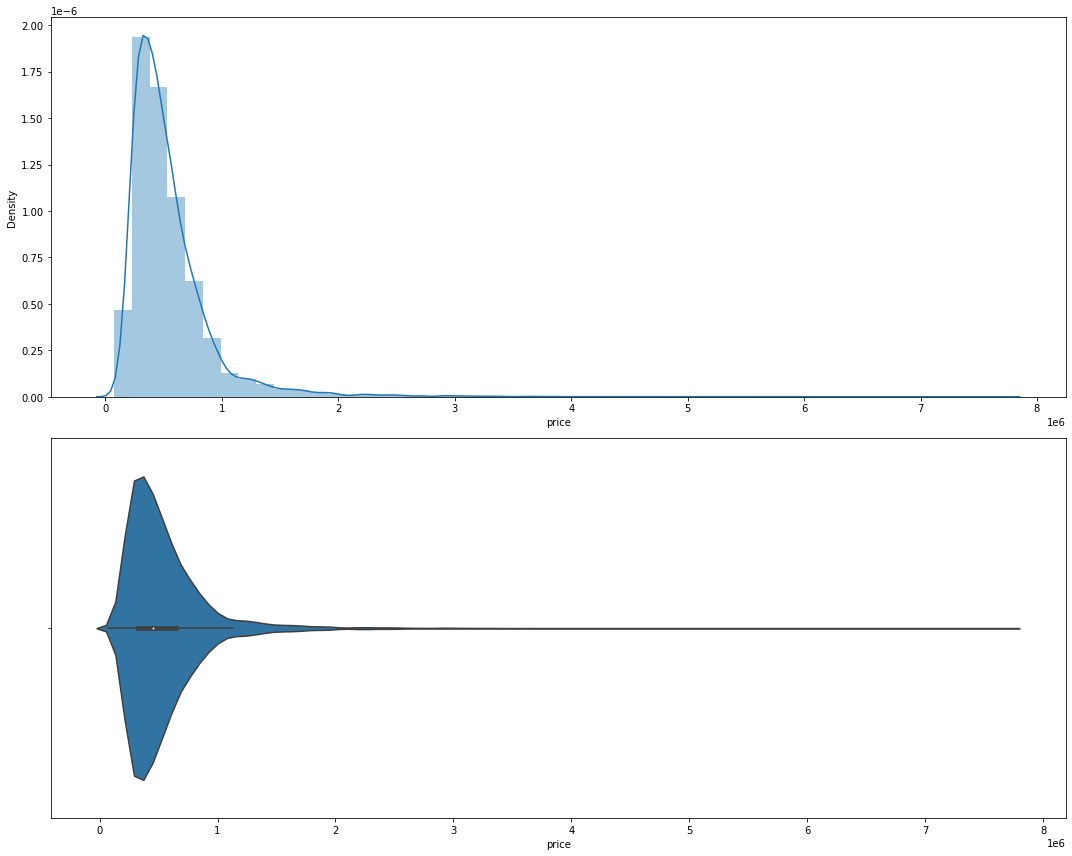

In [ ]:
# Plotting price denisty
fig = plt.figure(figsize=(15,12))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.violinplot(df['price'])
plt.tight_layout()

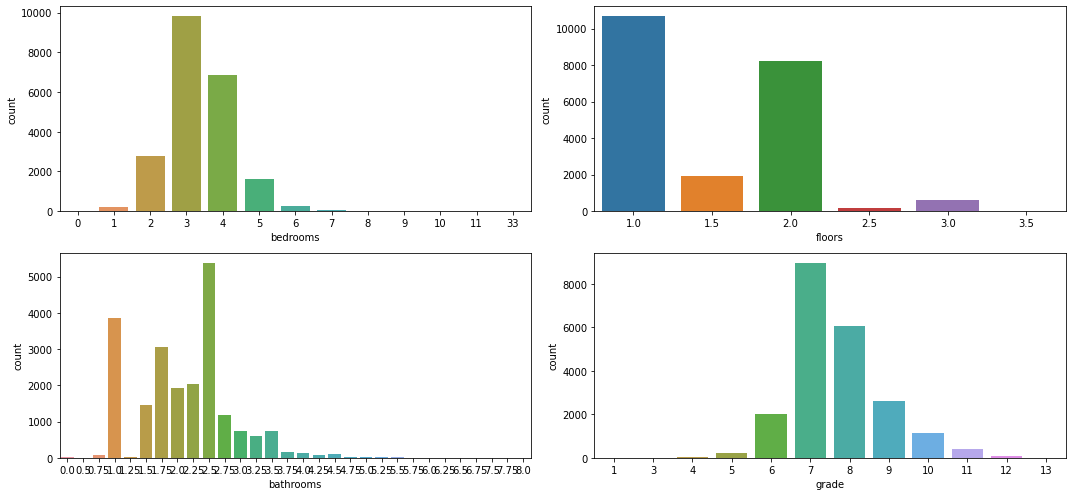

In [ ]:
# Plotting counts of features
fig = plt.figure(figsize=(15,7),constrained_layout=False)
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])
plt.tight_layout()

In [ ]:
df.corr()['price'].sort_values()

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

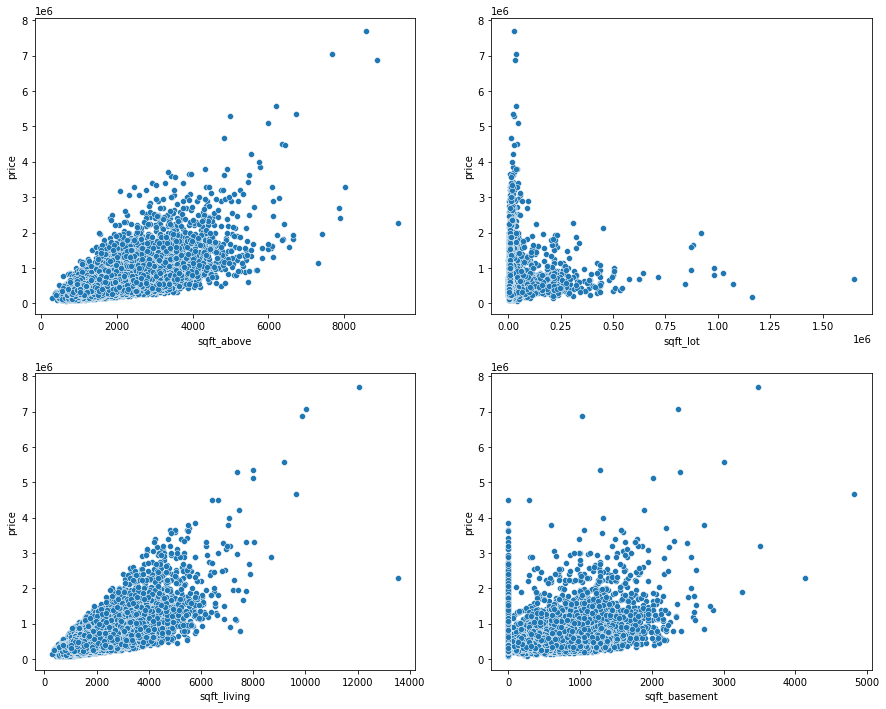

In [ ]:
#Plotting Price --> Size relation
fig = plt.figure(figsize=(15,12))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price'])

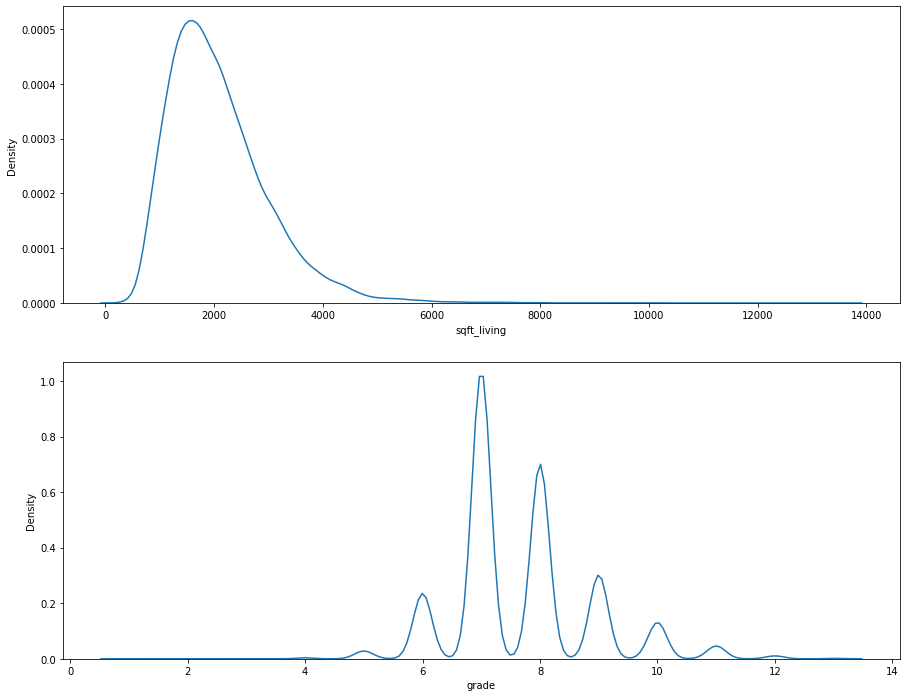

In [ ]:
# Plotting highest two correlations
fig = plt.figure(figsize=(15,12))
fig.add_subplot(2,1,1)
sns.kdeplot(df['sqft_living'])
fig.add_subplot(2,1,2)
sns.kdeplot(df['grade'])

> #### break the Data to year and month as prices differ as years go by and different month have different pricing

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


> #### Plot the relation between prices and both month and year

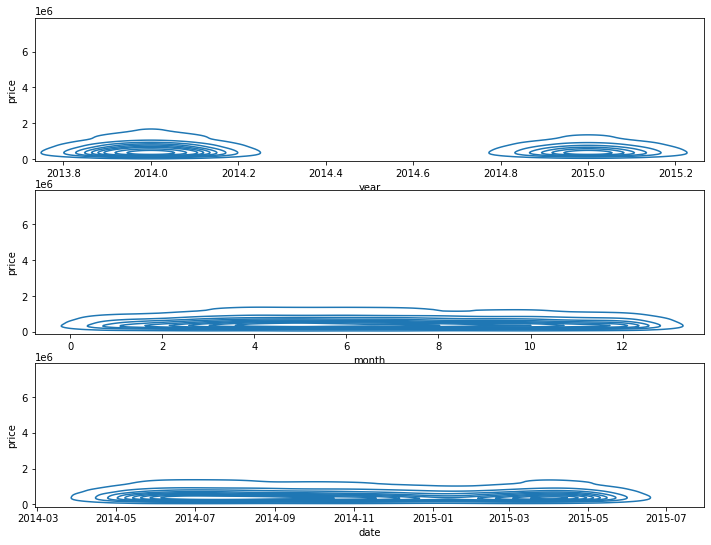

In [ ]:
fig = plt.figure(figsize=(12,9))
fig.add_subplot(3,1,1)
sns.kdeplot(df['year'], df['price'])
fig.add_subplot(3,1,2)
sns.kdeplot(df['month'], df['price'])
fig.add_subplot(3,1,3)
sns.kdeplot(df['date'], df['price'])

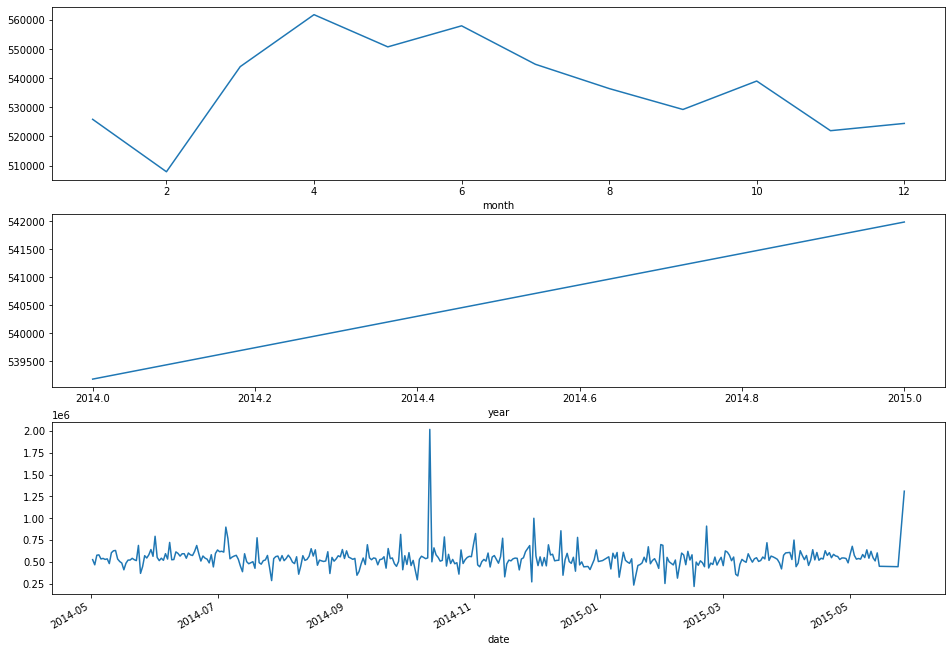

In [ ]:
fig = plt.figure(figsize=(16,12))
fig.add_subplot(3,1,1)
df.groupby('month').mean()['price'].plot()
fig.add_subplot(3,1,2)
df.groupby('year').mean()['price'].plot()
fig.add_subplot(3,1,3)
df.groupby('date').mean()['price'].plot()

>#### Year and month are more informing than the overall date so we drop date and use the other two

In [ ]:
df = df.drop('date', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


## Now we perform feature scaling on the data and split it to train, test and validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('price',axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

## Now we pass the data to out models, We will start with the Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-32174.2645862 ,  28314.47160234,  80960.8365489 ,   6428.24177905,
         3413.70406639,  49942.35152741,  36835.82051685,  21903.68879982,
       116003.40529456,  76073.5117404 ,  25375.83805414, -72994.52529983,
         7676.57141888,  78057.84710672, -17254.48220907,  18909.70160034,
       -10301.37920458,   4182.48580611,  17081.43533197])

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,349950.0,530667.784120
1,450000.0,667025.076946
2,635000.0,553195.043391
3,355500.0,346657.166101
4,246950.0,61378.186019
5,406550.0,481162.809294
6,350000.0,312819.788488
7,226500.0,273833.027682
8,265000.0,280571.649291
9,656000.0,532966.844438


> #### We will use the mean squared error to evaluate the performance of the model

In [ ]:
from sklearn import metrics
print('Mean Squared Error:{:.5f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score is: {:.5f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Squared Error:40601153229.61855
Variance score is: 0.70397


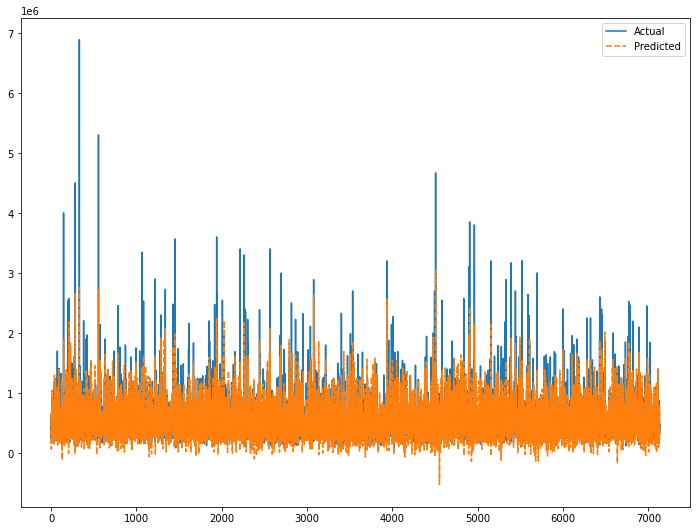

In [ ]:
# Plot y_pred and y_test
fig = plt.figure(figsize=(12,9))
fig.add_subplot(1,1,1)
sns.lineplot(data=df)

## We will use tensorflow keras framework to build a neural network model that does the regression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
# create validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
mse = MeanSquaredError()
model.compile(optimizer=Adam(), loss=mse)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=256,epochs=1000)

Epoch 1/1000
46/46 [==============================] - 1s 7ms/step - loss: 431251161088.0000 - val_loss: 401388634112.0000
Epoch 2/1000
46/46 [==============================] - 0s 4ms/step - loss: 431196831744.0000 - val_loss: 401199169536.0000
Epoch 3/1000
46/46 [==============================] - 0s 4ms/step - loss: 430398013440.0000 - val_loss: 399167651840.0000
Epoch 4/1000
46/46 [==============================] - 0s 4ms/step - loss: 425090449408.0000 - val_loss: 388648828928.0000
Epoch 5/1000
46/46 [==============================] - 0s 4ms/step - loss: 405036236800.0000 - val_loss: 355339567104.0000
Epoch 6/1000
46/46 [==============================] - 0s 4ms/step - loss: 351810977792.0000 - val_loss: 280161976320.0000
Epoch 7/1000
46/46 [==============================] - 0s 4ms/step - loss: 253789290496.0000 - val_loss: 169932308480.0000
Epoch 8/1000
46/46 [==============================] - 0s 4ms/step - loss: 142942699520.0000 - val_loss: 88926085120.0000
Epoch 9/1000
46/46 [=====

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1280      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred2 = model.predict(X_test)
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred2)))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred2)))

223/223 [==============================] - 0s 1ms/step
Mean Squared Error: 16242475408.30
Variance score is: 0.88


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2.reshape(-1,)})
df.head(10)

,Actual,Predicted
0,349950.0,150260.140625
1,450000.0,486095.656250
2,635000.0,699438.000000
3,355500.0,325172.875000
4,246950.0,302169.656250
5,406550.0,596765.687500
6,350000.0,417687.343750
7,226500.0,225321.843750
8,265000.0,245946.734375
9,656000.0,624252.000000


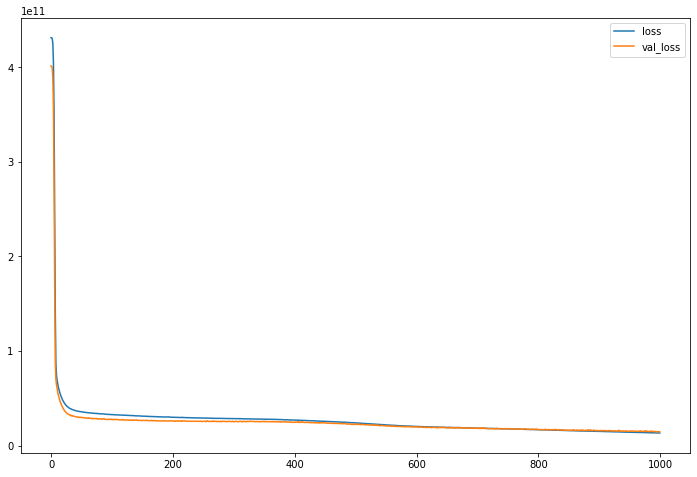

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

### lets compare both models with mse loss and variance

In [ ]:
print('Model: RelU Regression\n')

print('Mean Absolute Error(MAE): {:.5f}'.format(metrics.mean_absolute_error(y_test, y_pred2)))
print('Mean Squared Error(MSE): {:.5f}'.format(metrics.mean_squared_error(y_test, y_pred2)))
print('Root Mean Squared Error(RMSE): {:.5f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
print('Variance score: {:.5f}\n'.format(metrics.explained_variance_score(y_test,y_pred2)*100))
print('*********************************\n')
print('Model: Linear Regression\n')
print('Mean Absolute Error(MAE): {:.5f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error(MSE):{:.5f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error(RMSE):{:.5f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.5f}'.format(metrics.explained_variance_score(y_test,y_pred)*100))

Model: RelU Regression

Mean Absolute Error(MAE): 75842.13023
Mean Squared Error(MSE): 16242475408.30287
Root Mean Squared Error(RMSE): 127445.97055
Variance score: 88.15704

*********************************

Model: Linear Regression

Mean Absolute Error(MAE): 125933.74320
Mean Squared Error(MSE):40601153229.61855
Root Mean Squared Error(RMSE):201497.27847
Variance score: 70.39748


It is clear that the neural network model outperfroms the linear regression model by far more

## Finaly we will make our last model using keras but with SWISH activation function

In [ ]:
model = Sequential()

model.add(Dense(64,activation='swish'))
model.add(Dense(32,activation='swish'))
model.add(Dense(32,activation='swish'))
model.add(Dense(16,activation='swish'))
model.add(Dense(1))
mse = MeanSquaredError()
model.compile(optimizer=Adam(), loss=mse)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=256,epochs=1000)

Epoch 1/1000
46/46 [==============================] - 1s 8ms/step - loss: 431250210816.0000 - val_loss: 401384374272.0000
Epoch 2/1000
46/46 [==============================] - 0s 4ms/step - loss: 431182512128.0000 - val_loss: 401178722304.0000
Epoch 3/1000
46/46 [==============================] - 0s 5ms/step - loss: 430447624192.0000 - val_loss: 399437692928.0000
Epoch 4/1000
46/46 [==============================] - 0s 4ms/step - loss: 426217111552.0000 - val_loss: 391277084672.0000
Epoch 5/1000
46/46 [==============================] - 0s 4ms/step - loss: 410805764096.0000 - val_loss: 366099333120.0000
Epoch 6/1000
46/46 [==============================] - 0s 4ms/step - loss: 370965479424.0000 - val_loss: 309809840128.0000
Epoch 7/1000
46/46 [==============================] - 0s 5ms/step - loss: 295839399936.0000 - val_loss: 223580274688.0000
Epoch 8/1000
46/46 [==============================] - 0s 4ms/step - loss: 204744687616.0000 - val_loss: 149261631488.0000
Epoch 9/1000
46/46 [====

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                1280      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred3 = model.predict(X_test)
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred3)))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred3)))

223/223 [==============================] - 0s 2ms/step
Mean Squared Error: 15551073456.25
Variance score is: 0.89


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3.reshape(-1,)})
df.head(10)

,Actual,Predicted
0,349950.0,330906.437500
1,450000.0,440339.656250
2,635000.0,830843.937500
3,355500.0,350251.562500
4,246950.0,272211.750000
5,406550.0,569693.812500
6,350000.0,451996.281250
7,226500.0,203615.046875
8,265000.0,255364.468750
9,656000.0,638534.125000


In [ ]:
print('Model: RelU Regression\n')
print('Mean Absolute Error(MAE): {:.5f}'.format(metrics.mean_absolute_error(y_test, y_pred2)))
print('Mean Squared Error(MSE): {:.5f}'.format(metrics.mean_squared_error(y_test, y_pred2)))
print('Root Mean Squared Error(RMSE): {:.5f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
print('Variance score: {:.5f}\n'.format(metrics.explained_variance_score(y_test,y_pred2)*100))
print('*********************************\n')
print('Model: SWISH Regression\n')
print('Mean Absolute Error(MAE): {:.5f}'.format(metrics.mean_absolute_error(y_test, y_pred3))) 
print('Mean Squared Error(MSE):{:.5f}'.format(metrics.mean_squared_error(y_test, y_pred3)))  
print('Root Mean Squared Error(RMSE):{:.5f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))
print('Variance score: {:.5f}'.format(metrics.explained_variance_score(y_test,y_pred3)*100))

Model: RelU Regression

Mean Absolute Error(MAE): 75842.13023
Mean Squared Error(MSE): 16242475408.30287
Root Mean Squared Error(RMSE): 127445.97055
Variance score: 88.15704

*********************************

Model: SWISH Regression

Mean Absolute Error(MAE): 72693.11209
Mean Squared Error(MSE):15551073456.25373
Root Mean Squared Error(RMSE):124703.94323
Variance score: 88.66662


#### Eventhought the SWISH model doesn't outperfrom the RelU model by much it is to be noted that the SWISH model reached a good validation loss from the 500th iteration, on the other side the SWISH model back propagtion take more time than the RelU

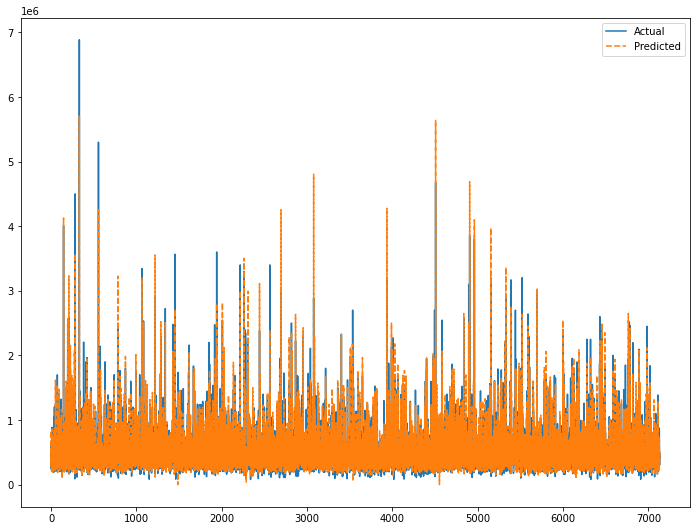

In [ ]:
# Plot y_pred and y_test
fig = plt.figure(figsize=(12,9))
fig.add_subplot(1,1,1)
sns.lineplot(data=df)